In [46]:
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [7]:
from enigmatoolbox.utils.parcellation import parcel_to_surface
from enigmatoolbox.plotting import plot_subcortical
from enigmatoolbox.plotting import plot_cortical

In [8]:

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

In [9]:
thick = ['lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_thickness',
 'lh_rostralanteriorcingulate_thickness',
 'lh_rostralmiddlefrontal_thickness',
 'lh_superiorfrontal_thickness',
 'lh_superiorparietal_thickness',
 'lh_superiortemporal_thickness',
 'lh_supramarginal_thickness',
 'lh_frontalpole_thickness',
 'lh_temporalpole_thickness',
 'lh_transversetemporal_thickness',
 'lh_insula_thickness',
 'rh_bankssts_thickness',
 'rh_caudalanteriorcingulate_thickness',
 'rh_caudalmiddlefrontal_thickness',
 'rh_cuneus_thickness',
 'rh_entorhinal_thickness',
 'rh_fusiform_thickness',
 'rh_inferiorparietal_thickness',
 'rh_inferiortemporal_thickness',
 'rh_isthmuscingulate_thickness',
 'rh_lateraloccipital_thickness',
 'rh_lateralorbitofrontal_thickness',
 'rh_lingual_thickness',
 'rh_medialorbitofrontal_thickness',
 'rh_middletemporal_thickness',
 'rh_parahippocampal_thickness',
 'rh_paracentral_thickness',
 'rh_parsopercularis_thickness',
 'rh_parsorbitalis_thickness',
 'rh_parstriangularis_thickness',
 'rh_pericalcarine_thickness',
 'rh_postcentral_thickness',
 'rh_posteriorcingulate_thickness',
 'rh_precentral_thickness',
 'rh_precuneus_thickness',
 'rh_rostralanteriorcingulate_thickness',
 'rh_rostralmiddlefrontal_thickness',
 'rh_superiorfrontal_thickness',
 'rh_superiorparietal_thickness',
 'rh_superiortemporal_thickness',
 'rh_supramarginal_thickness',
 'rh_frontalpole_thickness',
 'rh_temporalpole_thickness',
 'rh_transversetemporal_thickness',
 'rh_insula_thickness']

In [10]:
data_dir = '/Users/ltran/Documents/Data/'

# Load data

## Raw data

Filter on IQ

In [21]:
df = pd.read_csv(os.path.join(data_dir, 'Outputs/df_tsa_tca.csv'), sep = ',')

In [1173]:
df.loc[df.ASD == 'Relative', 'ASD'] = 'No'

In [1174]:
df.loc[df.ASD == 'TCA_pr', 'ASD'] = 'TCA'
df.loc[df.ASD == 'TCA_ac', 'ASD'] = 'TCA'

In [1184]:
df.groupby('ASD').size()

ASD
TCA_ac     33
TCA_pr     44
T_ARFID    12
dtype: int64

In [ ]:
thick = [col for col in df.columns if '_thickness' in col]
thick.remove('lh_MeanThickness_thickness')
thick.remove('rh_MeanThickness_thickness')

## Mutli-class prediction

In [1185]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelBinarizer
from scipy import sparse

In [1186]:
covs_num = ['age_at_scan']
covs_cat= ['Sex', 'Protocole', 'scanner']
covs = covs_num + covs_cat


df = df.reset_index(drop = True)

In [1187]:
df_y = pd.DataFrame(LabelBinarizer().fit_transform(df.ASD))

Multiclass SVC leave-one-out

In [1180]:
s = []

for i in range(len(df)):


    temp_train = df.drop(index = i)
    temp_test = df.iloc[i]

    train_x = temp_train[thick+covs]
    X =pd.get_dummies(train_x, columns = covs_cat)
    Y = df_y.drop(index = i)

    test_x = pd.DataFrame(temp_test[thick+covs]).T
    test_x = pd.get_dummies(test_x, columns = covs_cat)


    test_y = pd.DataFrame(df_y.iloc[i]).T
    X =X.drop(columns= X.columns[~(X.columns.isin(test_x.columns))])


    res = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, Y).predict(test_x)

    yhat = pd.DataFrame(df_y.iloc[i]).T.reset_index(drop = True)
    y = pd.DataFrame(res)

    score = (y * yhat)
    s.append(score.sum().sum()/score.shape[0])

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225

In [1181]:
print('Score prediction ', sum(s)/len(s))

0.449438202247191

## Binary Classification

In [327]:
l_score = []

# TCA
# Yes

for i in range(500):
#     df_temp =  pd.concat([df[df.ASD == 'TCA'].sample(n = 39), df[df.ASD == 'No'].sample(n = 39)])
#     df_temp = pd.concat([df[df.ASD == 'No'].sample(n = 39), df[df.ASD == 'Yes'].sample(n = 39)])
#     df_temp = df.drop(index = df[df.ASD == 'Yes'].sample(n = 172).index)
#     df_temp = df.drop(index = df[df.ASD == 'TCA'].sample(n = 53).index)
#     df_temp = pd.concat([df[df.ASD == 'No'].sample(n = 39), df[df.ASD == 'TCA'].sample(n = 39)])
    
    # Train set
    df_sx, df_tex1, df_sy, df_tey1 = train_test_split(df[thick+covs], df['ASD'], 
                                                    test_size=0.5,
#                                                    stratify = df[[ 'Sex']]
                                                     )

    
    X = pd.get_dummies(df_sx, columns= covs_cat, drop_first = True)
    Y = pd.get_dummies(df_sy,  drop_first=True)['TCA_pr']
    
    svc = svm.SVC(kernel = 'linear'). fit(X, Y)
    

    df_test = df_temp.drop(index = df_train.index)
    
    X_test =  pd.get_dummies(df_tex1, columns= covs_cat, drop_first = True)
    Y_test = pd.get_dummies(df_tey1,  drop_first= True)['TCA_pr']
    
    classesPredites = svc.predict(X_test)
    l_score.append(svc.score(X_test, Y_test))


In [1]:
print('Prediction score: ', sum(l_score) / len(l_score))

NameError: name 'l_score' is not defined

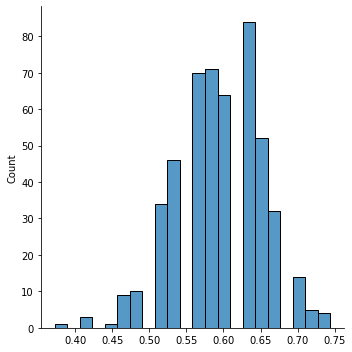

In [260]:
sns.displot(x = l_score)